In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
db=pd.read_csv('/diabetes.csv')

# New section

In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

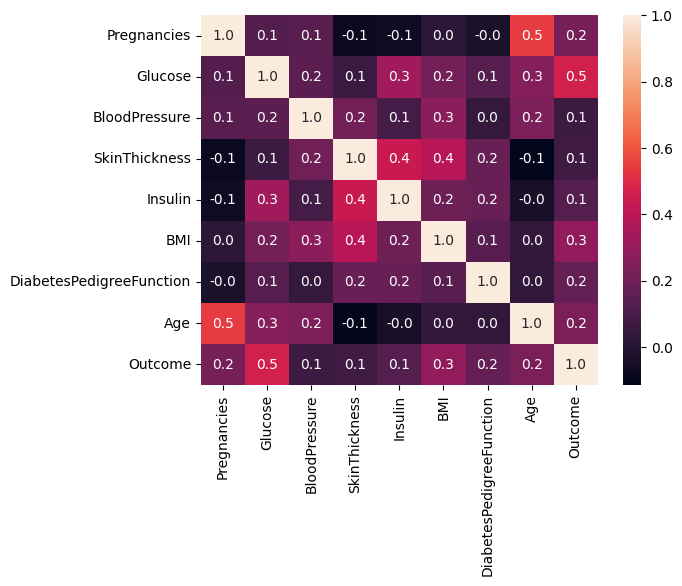

In [ ]:
sns.heatmap(db.corr(),annot=True,fmt='0.1f')

In [ ]:
x = db.iloc[:,:-1]
y = db.iloc[:,-1]
print(x.shape,y.shape)

(768, 8) (768,)


In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=57)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
ypred[:10]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
ytest[:10]

29     0
126    0
292    1
453    0
392    0
201    0
523    1
385    0
91     0
212    0
Name: Outcome, dtype: int64

In [ ]:
lr.score(xtest,ytest)

0.8506493506493507

<Axes: >

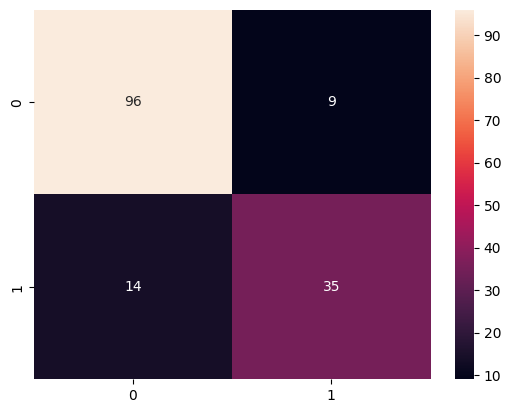

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
import pickle as pkl

In [ ]:
filename="diabetes_model.sav"
pkl.dump(lr,open(filename,"bw"))

In [ ]:
loaded_model= pkl.load(open(filename,"br"))
loaded_model

LogisticRegression()

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
print(db.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
def diab(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin, BMI, DiabetesPedigreeFunction,Age):
  x=np.array([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin, BMI, DiabetesPedigreeFunction,Age])
  prediction=lr.predict(x.reshape(1,-1))
  if prediction == 0:
    return "tested as negative for diabetes"
  else:
    return "tested as positive for diabetes"

In [ ]:
app=gr.Interface(fn=diab,inputs=[gr.components.Number(label="No. of Pregnancies"),
                        gr.components.Number(label="Glucose Level"),
                        gr.components.Number(label="Blood Pressure"),
                        gr.components.Number(label="Skin Thickness"),
                        gr.components.Number(label="Insulin"),
                        gr.components.Number(label="Enter your BMI"),
                        gr.components.Number(label="Enter Diabetes Pedigree Function"),
                        gr.components.Number(label="Enter your age")],
                 outputs=gr.components.Label(num_top_classes=2),
                 title="Developing an ML Model for Predicting Diabetes"
                 )

In [ ]:
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://115bb423589a0d7b62.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
